In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Resources

[OpenEI dataset](https://openei.org/doe-opendata/dataset/1be0a37f-28e5-4021-84bb-39a643250102/resource/bbeccdf5-301e-4390-b503-7d9f8d404986/download/wind50mresourcearea.xlsx)  
[DTU wind atlas](https://globalwindatlas.info/)

### Onshore

In [2]:
windpath = 'http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx'

In [3]:
wind = pd.read_excel(windpath, sheet_name='Onshore Power', skiprows=2)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_cap = {}
for i in wind.T.iteritems():
    country = i[1][0]
    for k in range(1, 10):
        if country not in wind_cap: wind_cap[country] = {}
        clas = k
        cap = i[1][k] + i[1][
            k + 10]  # + i[1][k+20] #last one too far 0-50,50-100,100-5000
        wind_cap[country][
            clas] = cap / 1000.0  #workbook reported values in GW, we use TW

In [4]:
wind = pd.read_excel(windpath, sheet_name='Onshore Energy', skiprows=2)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_res = {}
for i in wind.T.iteritems():
    country = i[1][0]
    for k in range(1, 10):
        if country not in wind_res: wind_res[country] = {}
        clas = k
        cap = i[1][k] + i[1][
            k + 10]  # + i[1][k+20] #last one too far 0-50,50-100,100-5000
        wind_res[country][
            clas] = cap * 1000.0  #workbook reported values in PWh, we use TWh

Power

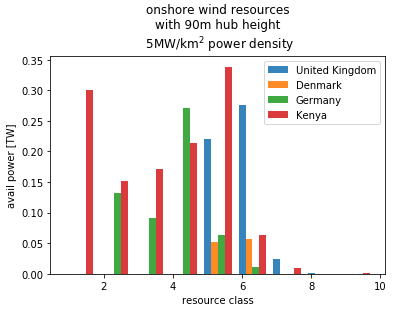

In [5]:
countries = ['United Kingdom', 'Denmark', 'Germany', 'Kenya']
for i, country in enumerate(countries):
    plt.bar(
        np.array(list(wind_cap[country].keys())) + 0.2 * i,
        wind_cap[country].values(),
        alpha=0.9,
        width=0.2,
        label=country)
plt.ylabel('avail power [TW]')
plt.title(
    'onshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('resource class')
plt.legend()

Capacity Factors

In [6]:
cf = pd.read_excel(windpath, sheet_name='General', skiprows=1)
cf = cf[['Wind Classes', 'Capacity Factor']][:9]
cf

,Wind Classes,Capacity Factor
0,c1,0-0.18
1,c2,0.18-0.22
2,c3,0.22-0.26
3,c4,0.26-0.3
4,c5,0.3-0.34
5,c6,0.34-0.38
6,c7,0.38-0.42
7,c8,0.42-0.46
8,c9,0.46-1.0


Energy

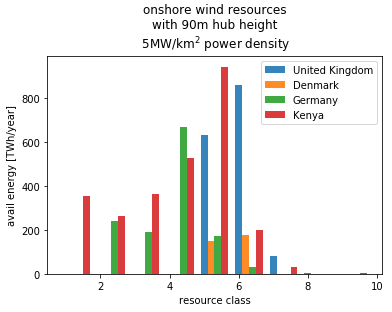

In [7]:
countries = ['United Kingdom', 'Denmark', 'Germany', 'Kenya']
for i, country in enumerate(countries):
    plt.bar(
        np.array(list(wind_res[country].keys())) + 0.2 * i,
        wind_res[country].values(),
        alpha=0.9,
        width=0.2,
        label=country)
plt.ylabel('avail energy [TWh/year]')
plt.title(
    'onshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('resource class')
plt.legend()

In [8]:
#!pip install plotly

Intall `plotly` if you haven't before.  
Then configure credentials at `~/.plotly/.credentials`.  
Create user and get API key from https://plot.ly/settings/api#/

In [9]:
import plotly.plotly as py
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

This workbook run plotly in offline mode.

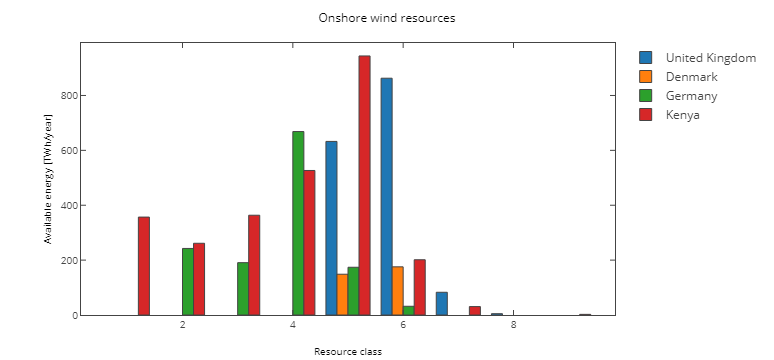

In [11]:
mpl_fig = plt.figure(figsize=(9, 5))
ax = mpl_fig.add_subplot(111)
x = np.array(list(wind_res[countries[0]].keys()))

for i, country in enumerate(countries):
    y = wind_res[country].values()
    ax.bar(x, y, width=0.8)
ax.set_ylabel('Available energy [TWh/year]')
ax.set_xlabel('Resource class')
ax.set_title('Onshore wind resources')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i, e in enumerate(plotly_fig['data']):
    e['name'] = countries[i]
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode'] = 'x'
iplot(plotly_fig, filename='ons1')

### Offshore

Power

In [ ]:
wind = pd.read_excel(windpath, sheet_name='Offshore Power', skiprows=3)
wind_cap2 = {}
country = ''
for i in wind.T.iteritems():
    if str(i[1][0]) != 'nan':
        country = str(i[1][0])
    water = str(i[1][1])
    if water in {'shallow', 'transitional'}:  #skip deep for now
        for k in range(2, 11):
            if country not in wind_cap2: wind_cap2[country] = {}
            clas = k - 1
            cap = i[1][k] + i[1][
                k + 10]  # + i[1][k+20] #last one too far 0-50,50-100,100-5000
            if clas not in wind_cap2[country]: wind_cap2[country][clas] = 0
            wind_cap2[country][clas] += cap / 1000.0

In [ ]:
countries = ['United Kingdom', 'Denmark', 'Germany', 'Chile']
mpl_fig = plt.figure(figsize=(9, 6))
ax = mpl_fig.add_subplot(111)
x = np.array(list(wind_cap2[countries[0]].keys()))

for i, country in enumerate(countries):
    y = wind_cap2[country].values()
    ax.bar(x, y, width=0.8)
ax.set_ylabel('Available power [TW]')
ax.set_xlabel('Resource class')
ax.set_title('Offshore wind resources')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i, e in enumerate(plotly_fig['data']):
    e['name'] = countries[i]
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode'] = 'x'
iplot(plotly_fig, filename='ofs1')

Energy

In [13]:
wind = pd.read_excel(windpath, sheet_name='Offshore Energy', skiprows=3)
wind_res2 = {}
country = ''
for i in wind.T.iteritems():
    if str(i[1][0]) != 'nan':
        country = str(i[1][0])
    water = str(i[1][1])
    if water in {'shallow', 'transitional'}:  #skip deep for now
        for k in range(2, 11):
            if country not in wind_res2: wind_res2[country] = {}
            clas = k - 1
            cap = i[1][k] + i[1][
                k + 10]  # + i[1][k+20] #last one too far 0-50,50-100,100-5000
            if clas not in wind_res2[country]: wind_res2[country][clas] = 0
            wind_res2[country][clas] += cap * 1000.0

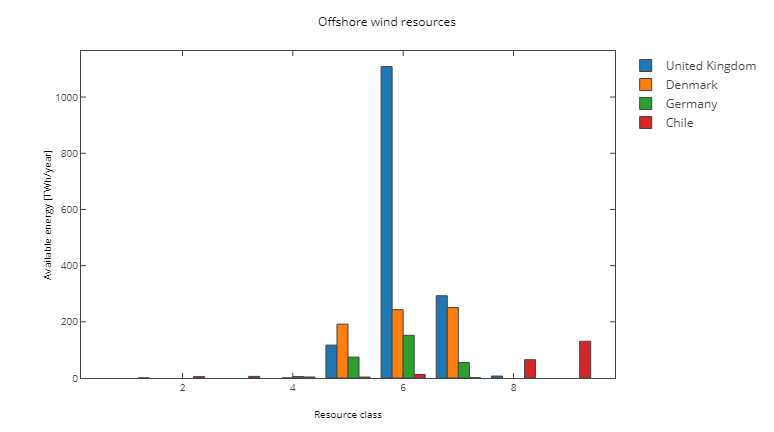

In [14]:
mpl_fig = plt.figure(figsize=(9, 6))
ax = mpl_fig.add_subplot(111)
x = np.array(list(wind_res2[countries[0]].keys()))

for i, country in enumerate(countries):
    y = wind_res2[country].values()
    ax.bar(x, y, width=0.8)
ax.set_ylabel('Available energy [TWh/year]')
ax.set_xlabel('Resource class')
ax.set_title('Offshore wind resources')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i, e in enumerate(plotly_fig['data']):
    e['name'] = countries[i]
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode'] = 'x'
iplot(plotly_fig, filename='ofs2')

### Convert wind classes to *m/s* speeds

https://www.nrel.gov/gis/data-wind.html

In [21]:
df = pd.read_html('https://www.nrel.gov/gis/data-wind.html')[0]

In [22]:
df = df[1::2].reset_index()

In [23]:
df2 = df.copy()
df2.columns = df2.loc[0]
df = df[1:]

In [24]:
df2[1:]

,1,Wind Power Density (W/m2),Speedb m/s (mph),Wind Power Density (W/m2),Speedb m/s (mph),nan
1,3,100,4.4 (9.8),200,5.6 (12.5),NaN
2,5,150,5.1 (11.5),300,6.4 (14.3),NaN
3,7,200,5.6 (12.5),400,7.0 (15.7),NaN
4,9,250,6.0 (13.4),500,7.5 (16.8),NaN
5,11,300,6.4 (14.3),600,8.0 (17.9),NaN
6,13,400,7.0 (15.7),800,8.8 (19.7),NaN
7,15,1000,9.4 (21.1),2000,11.9 (26.6),NaN


In [25]:
classes = list(df.index)  #extract classes

In [26]:
x10m = np.array(
    [float(i[:i.find(' ')]) for i in df[1]])  #wind speed at 10m hub height
x50m = np.array(
    [float(i[:i.find(' ')]) for i in df[3]])  #wind speed at 50m hub height

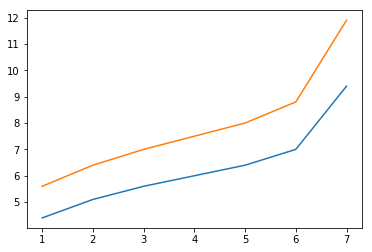

In [27]:
plt.plot(classes, x10m)
plt.plot(classes, x50m)

http://windpower.generatorguide.net/wind-speed-power.html

In [28]:
def height_converter(h, href, vref):
    return vref * (h * 1.0 / href)**(1 / 7)

In [29]:
x90m1 = height_converter(90, 10, x10m)
x90m2 = height_converter(90, 50, x50m)
x90m = (x90m1 + x90m2) / 2.0

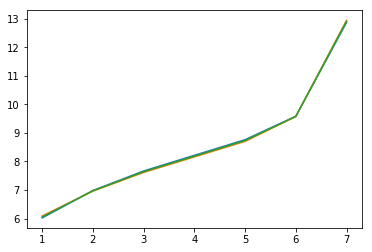

In [30]:
plt.plot(classes, x90m1)
plt.plot(classes, x90m2)
plt.plot(classes, x90m)

Cast the NREL 7 classes into the map's 9 classes.

In [31]:
x90m9cl = np.array(
    list(x90m[:-1]) + [
        x90m[-2] + (x90m[-1] - x90m[-2]) * 1 / 3, x90m[-2] +
        (x90m[-1] - x90m[-2]) * 2 / 3, x90m[-1]
    ])

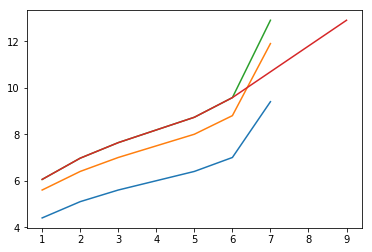

In [32]:
plt.plot(classes, x10m)
plt.plot(classes, x50m)
plt.plot(classes, x90m)
plt.plot(classes + [8, 9], x90m9cl)

In [33]:
class2speed = {i + 1: np.round(x90m9cl[i], 1) for i in range(len(x90m9cl))}

New plot with speeds

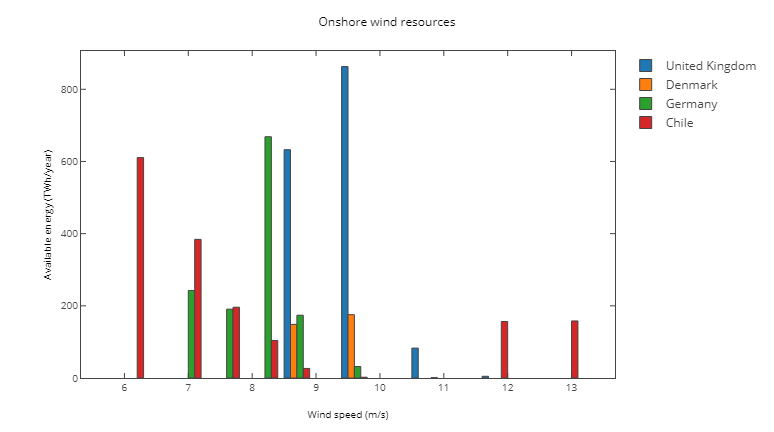

In [34]:
countries = ['United Kingdom', 'Denmark', 'Germany', 'Chile']
mpl_fig = plt.figure(figsize=(9, 6))
ax = mpl_fig.add_subplot(111)
x = [class2speed[i] for i in wind_res[countries[0]].keys()]

for i, country in enumerate(countries):
    y = wind_res[country].values()
    ax.bar(x, y, width=0.8)
ax.set_ylabel('Available energy (TWh/year)')
ax.set_xlabel('Wind speed (m/s)')
ax.set_title('Onshore wind resources')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i, e in enumerate(plotly_fig['data']):
    e['name'] = countries[i]
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode'] = 'x'
iplot(plotly_fig, filename='ons3')

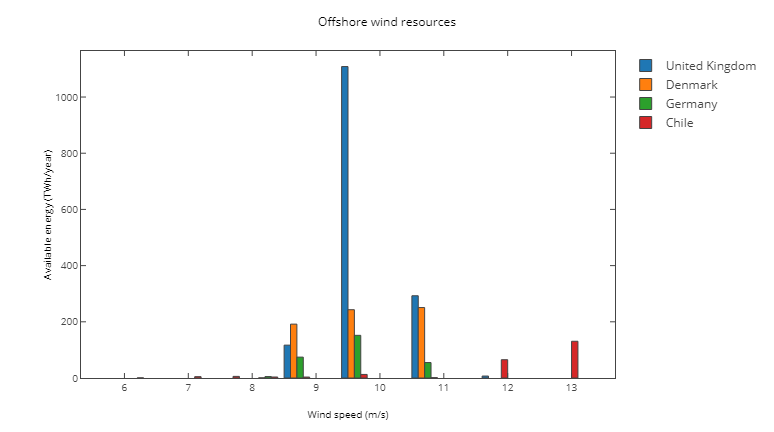

In [36]:
mpl_fig = plt.figure(figsize=(9, 6))
ax = mpl_fig.add_subplot(111)
x = [class2speed[i] for i in wind_res2[countries[0]].keys()]

for i, country in enumerate(countries):
    y = wind_res2[country].values()
    ax.bar(x, y, width=0.8)
ax.set_ylabel('Available energy (TWh/year)')
ax.set_xlabel('Wind speed (m/s)')
ax.set_title('Offshore wind resources')
#ax.set_yscale('log')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i, e in enumerate(plotly_fig['data']):
    e['name'] = countries[i]
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode'] = 'x'
iplot(plotly_fig, filename='ofs3')

## Turbines

In [37]:
df = pd.read_excel(
    'data/wind_farms_with_ws_2k_5k_sgouris edited.xlsx', sheet_name='BASE')
df = df.dropna()
turbines = df.set_index(['ISO_CODE', 'Year'])

In [38]:
turbines.head()

ID OFFSHORE POWER_KW   WS_est
ISO_CODE Year                                 
FR       2003.0   1       no    12000  8.55312
         2003.0   2       no     7500  8.58871
         2005.0   5       no    11900  8.30861
         2002.0   6       no     8000  6.72163
         2002.0   7       no     1500  6.72163

### Onshore

In [39]:
def projects(df, c, offshore=False, cumulative=True, mincap=0, minyear=0):
    x = []
    y = []
    z = []
    w = []
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        if cumulative:
            dz = df.loc[c].loc[[k for k in df.loc[c].index.unique() if k <= i]]
        else:
            dz = df.loc[c].loc[[k for k in df.loc[c].index.unique() if k == i]]
        y.append(np.average(dz['WS_est'].astype(float).values))
        try:
            z.append(
                np.average(
                    dz['WS_est'], weights=dz['POWER_KW'].astype(float).values))
        except:
            z.append(np.average(dz['WS_est']))
        w.append(np.sum(dz['POWER_KW']))
    if offshore:
        if minyear == 0: minyear = minyear_ofs * 1.0
        if mincap == 0: mincap = mincap_ofs * 1.0
    else:
        if minyear == 0: minyear = minyear_ons * 1.0
        if mincap == 0: mincap = mincap_ons * 1.0
    if not cumulative: mincap = 1
    rs = [r for r in range(len(x)) if x[r] >= minyear and w[r] >= mincap]
    x = np.array(x)[rs]
    y = np.array(y)[rs]
    z = np.array(z)[rs]
    w = np.array(w)[rs]
    return x, y, z, w

In [40]:
ons=turbines[((turbines['POWER_KW'].replace('#ND',0).astype(int)>0)&\
       (turbines['POWER_KW'].replace('#ND',0).astype(int)<1000000)&(turbines['OFFSHORE']=='no'))]
ofs=turbines[((turbines['POWER_KW'].replace('#ND',0).astype(int)>0)&\
       (turbines['POWER_KW'].replace('#ND',0).astype(int)<1000000)&(turbines['OFFSHORE']=='yes'))]

It does not make sense to inlcude all countries with very few turbines. Therefore we filter the dataset based on two critetria:  
 - in the early days, most turbines very research pilots. We therefore set a minimum starting year. This is separate for onshore and offshore turbines (e.g. 1990, 2000)
 - even after this period, we filter out early years, when countries only have a small capacity of wind power installed (e.g. less than 10 MW)

In [41]:
#filter dataset to min year and min cap
minyear_ons = 1990
minyear_ofs = 2000
mincap_ons = 10000  #kW
mincap_ofs = 10000  #kW

Custom `mincap` and `minyear`

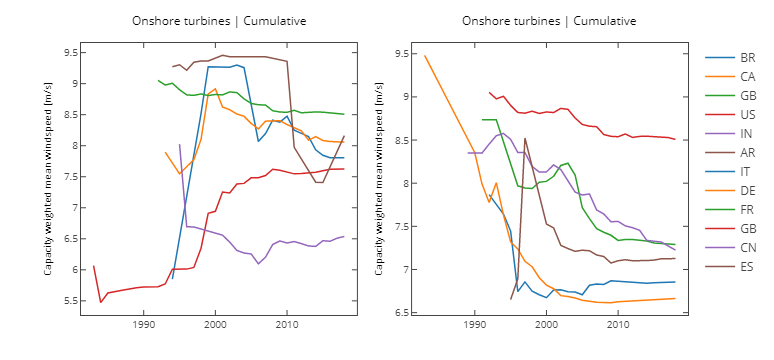

In [42]:
countries = [{'BR', 'AR', 'GB', 'CA', 'US', 'IN'},
             {'FR', 'DE', 'CN', 'IT', 'ES', 'GB'}]

fig, ax = plt.subplots(1, 2, figsize=(9, 5))
for s in range(len(countries)):
    for c in countries[s]:
        x, y, z, w = projects(ons, c, offshore=False, mincap=0.1, minyear=1980)
        ax[s].plot(x, z, label=c)

    ax[s].set_ylabel('Capacity weighted mean windspeed [m/s]')
    ax[s].set_title("Onshore turbines | Cumulative")

plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode'] = 'x'
iplot(plotly_fig, filename='ons4')

Default plots

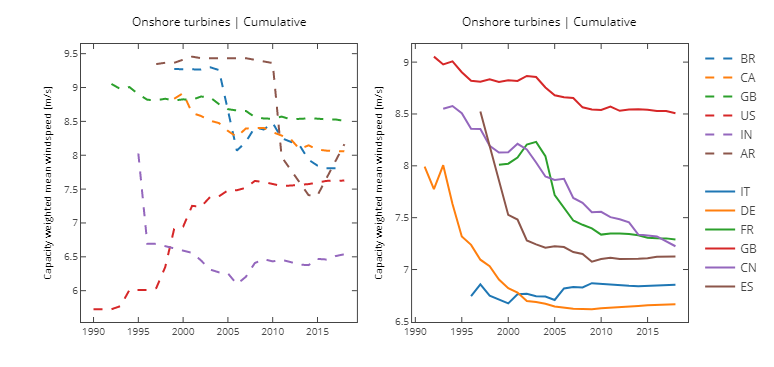

In [74]:
countries = [{'BR', 'AR', 'GB', 'CA', 'US', 'IN'},
             {'FR', 'DE', 'CN', 'IT', 'ES', 'GB'}]
plot_labels=[' ',' ']

fig, ax = plt.subplots(1, 2, figsize=(9, 5.1))
for s in range(len(countries)):
    for i,c in enumerate(countries[s]):
        x, y, z, w = projects(ons, c, offshore=False)
        if i==0:
            if s==1:
                ax[s].plot(x[0], z[0], label=plot_labels[s],color='k',lw=0)
                ls='-'
            else:
                ls='--'
        ax[s].plot(x, z, label=c,ls=ls,lw=2)

    ax[s].set_ylabel('Capacity weighted mean windspeed [m/s]')
    ax[s].set_title("Onshore turbines | Cumulative")
        
plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode'] = 'x'
iplot(plotly_fig, filename='ons4')

### Offshore

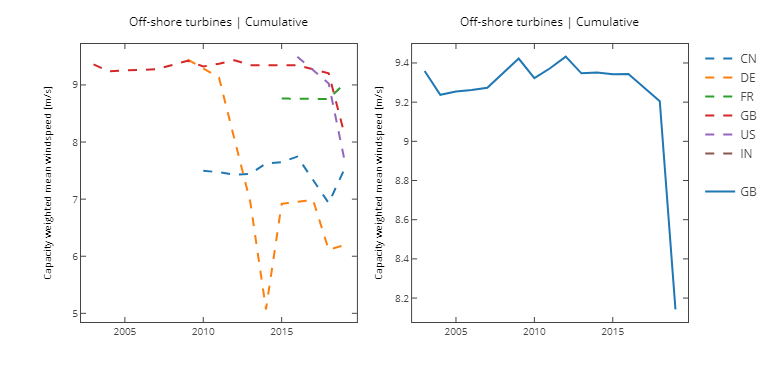

In [77]:
df=turbines[((turbines['POWER_KW'].replace('#ND',0).astype(int)>0)&\
       (turbines['POWER_KW'].replace('#ND',0).astype(int)<1000000)&(turbines['OFFSHORE']=='yes'))]
countries = [{'GB', 'US', 'IN', 'CN', 'FR', 'DE'}, {'GB'}]

plot_labels=[' ',' ']

fig, ax = plt.subplots(1, 2, figsize=(9, 5.1))
for s in range(len(countries)):
    for i,c in enumerate(countries[s]):
        x, y, z, w = projects(ofs, c, offshore=True)
        if i==0:
            if s==1:
                ax[s].plot(x[0], z[0], label=plot_labels[s],color='k',lw=0)
                ls='-'
            else:
                ls='--'
        ax[s].plot(x, z, label=c,ls=ls,lw=2)

    ax[s].set_ylabel('Capacity weighted mean windspeed [m/s]')
    ax[s].set_title("Off-shore turbines | Cumulative")

plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode'] = 'x'
iplot(plotly_fig, filename='ofs4')

Compare turbines with resources

Install country name converter

In [78]:
#!pip install pycountry

In [79]:
import pycountry
countries = list(pycountry.countries)

In [80]:
def cnc(cs):
    c2s = []
    cdict = {i.alpha_2: i.name for i in countries if i.alpha_2 in cs}
    for ci in range(len(cs)):
        c = cdict[cs[ci]]
        if c in wind_res.keys():
            c2s.append(c)
        elif c == 'United States':
            c2s.append('United States of America')
        elif c == 'Korea, Republic of':
            c2s.append('Republic of Korea')
        elif c == 'Czechia':
            c2s.append('Czech Republic')
        elif c == 'Venezuela, Bolivarian Republic of':
            c2s.append('Venezuela')
        elif c == 'Iran, Islamic Republic of':
            c2s.append('Iran (Islamic Republic of)')
        elif c == 'Taiwan, Province of China':
            c2s.append('Taiwan')
        elif c == 'Bolivia, Plurinational State of':
            c2s.append('Bolivia')
        elif c == 'Tanzania, United Republic of':
            c2s.append('United Republic of Tanzania')
        elif c == 'Macedonia, Republic of':
            c2s.append('TFYR Macedonia')
        else:
            c2s.append('Unassigned Resource (~3/4 is Alaska)')
    return c2s

Pretty country names for labelling

In [81]:
def pretty(c):
    if c == 'United States of America': return 'United States'
    elif c == 'Republic of Korea': return 'South Korea'
    return c

Define main plotter function

This function creates a plot with 3 subplots:  
 1. First we have teh resource distribution by wind class (converted and represented in the form on wind speed at 90m hub height.
 1. We also indicate the average of the resource distributions as a dot, calculated as a weighted mean of wind speed by the available power in each bracket.
 1. We show the progression of the average wind speed, calculated as a cumulative mean over time. We weights the wind pseeds of each project location by the nameplate capacities of the projects. This is the solid line.
 1. We also show the evolution of total cumulative installed generation capacity of the countries parallel to the wind speeds over time. This is the dashed line and it is measuted on the right axis.

In [145]:
def plotter(df,
            cs,
            c2s,
            colors,
            offshore=True,
            cumulative=True,
            axistype='linear',
            mincap=0,
            minyear=0,
            minclass=0.1):
    fig = tools.make_subplots(
        rows=1, cols=3, print_grid=False)
    axes = []
    smoothing = [0.4, 0.9]
    if offshore:
        tl = 'Offshore'
        res = wind_res2
    else:
        tl = 'Onshore'
        res = wind_res
    if cumulative:
        cumu = 'Cumulative'
    else:
        cumu = 'Yearly'
    for i in range(len(cs)):
        c = cs[i]
        c2 = c2s[i]
        c3 = pretty(c2)
        x, y, z, w = projects(
            df,
            c,
            cumulative=cumulative,
            offshore=offshore,
            mincap=mincap,
            minyear=minyear)
        xh = [i for i in res[c2].keys()]  #helper
        x2 = [class2speed[i] for i in res[c2].keys()]
        y2 = np.array(list(res[c2].values()))
        #'''
        #filter to nonzero classes
        rs = [r for r in range(len(y2)) if y2[r] > minclass]
        xh2 = np.array(xh)[rs]
        if min(xh2) > min(xh):
            rs = np.insert(rs, 0, rs[0] - 1)
        if max(xh2) < max(xh):
            rs = np.insert(rs, len(rs), rs[-1] + 1)
        x2 = np.array(x2)[rs]
        y2 = np.array(y2)[rs]
        #'''
        #calculate average resource class, weighted by available capacity in each class
        x2a = np.average(x2, weights=y2)
        fig.append_trace(
            go.Scatter(
                x=y2,
                y=x2,
                mode='lines',
                fill='tozerox',
                hoveron='fills',
                legendgroup=c3,
                name=c3,
                line=dict(
                    color=colors[i], shape='spline', smoothing=smoothing[1])),
            1, 1)
        axes.append({
            'x': '',
            'y': ''
        })
        fig.append_trace(
            go.Scatter(
                x=[-100],
                y=[x2a],
                legendgroup=c3,
                name='mean ' + c,
                marker=dict(color=colors[i], ),
                showlegend=False), 1, 1)
        axes.append({
            'x': '',
            'y': ''
        })
        fig.append_trace(
            go.Scatter(
                x=x,
                y=z,
                mode='lines',
                name='wind speed ' + c,
                legendgroup=c3,
                line=dict(
                    color=colors[i], shape='spline', smoothing=smoothing[0]),
                showlegend=False), 1, 2)
        axes.append({
            'x': '2',
            'y': ''
        })
        fig.append_trace(
            go.Scatter(
                x=x,
                y=np.array(w) / 1e6,  #kW to GW conversion
                mode='lines',
                name='capacity ' + c,
                legendgroup=c3,
                line=dict(
                    color=colors[i],
                    shape='spline',
                    dash='dash',
                    smoothing=smoothing[0]),
                showlegend=False),
            1,
            3)
        axes.append({
            'x': '2',
            'y': '2'
        })

    for i in range(len(fig['data'])):
        fig['data'][i]['xaxis'] = 'x' + axes[i]['x']
        fig['data'][i]['yaxis'] = 'y' + axes[i]['y']

    layout = go.Layout(
        xaxis=dict(
            domain=[0, 0.3],
            title='Available power (TW)',
            autorange='reversed',
            type=axistype),
        yaxis=dict(
            title='Wind speed (m/s)', hoverformat='.2f', zeroline=False),
        xaxis2=dict(domain=[0.3, 1], title='Year'),
        yaxis2=dict(
            overlaying='y',
            showgrid=False,
            side='right',
            anchor='x2',
            hoverformat='.2f',
            title=cumu + ' project capacity (GW)',
            zeroline=False),
        title=tl +
        ' wind resources vs. projects by capacity weighted average wind speed',
        legend=dict(orientation='h', x=0.55, y=1, xanchor='center'))
    fig["layout"] = layout
    fig["layout"]["showlegend"] = True
    fig["layout"]['hovermode'] = 'x'
    return fig

In [139]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

In [140]:
cs = ['GB', 'DE', 'FR', 'CN','US','CA']
c2s = ['United Kingdom', 'Germany', 'France', 'China', 'United States of America','Canada']
#generate nice colorscale: http://paletton.com
colors = ['#AA5585', '#499272', '#D46A6A', '#364FA1', '#D2B114', '#EE8A3A']

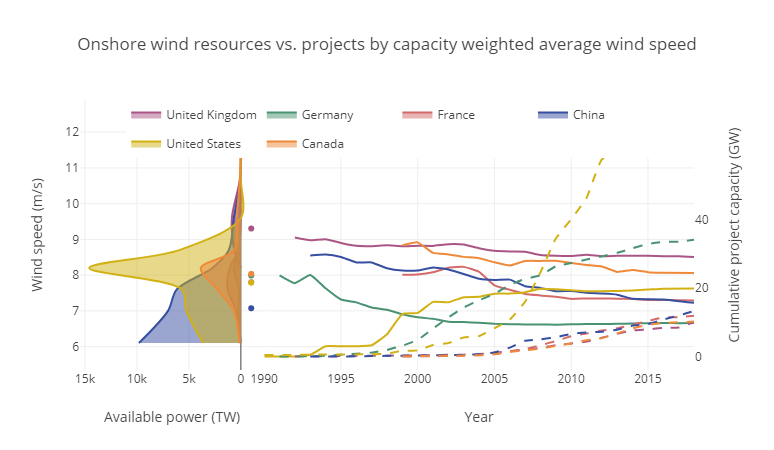

In [141]:
iplot(
    plotter(ons, cs, c2s, colors, offshore=False, cumulative=True),
    filename='ons1')

If we dont use a cumulative weighted wind speed, it is more difficult to track the progression. This just represents the average wind speed of the projects deployed in each year. This depends on a lot of local and temporal economic factors, therefore, we believe that the cumulative method gives a better understanding of the evolution of the resource quality of the chosen site locations over time.

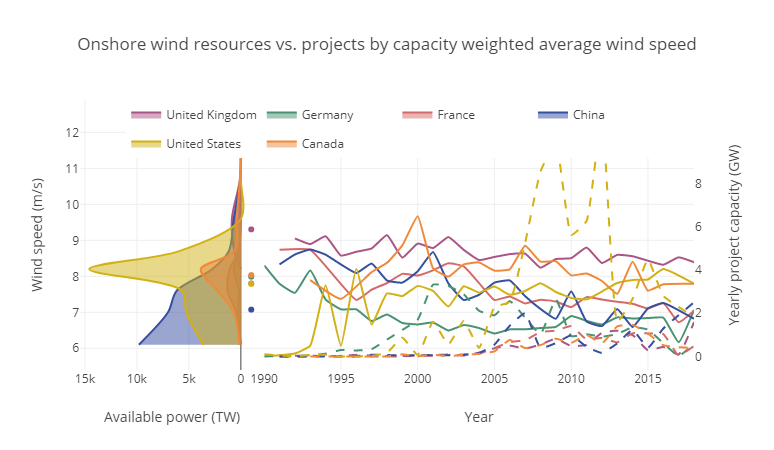

In [142]:
iplot(
    plotter(ons, cs, c2s, colors, offshore=False, cumulative=False),
    filename='ons2')

Repeat the same for offshore

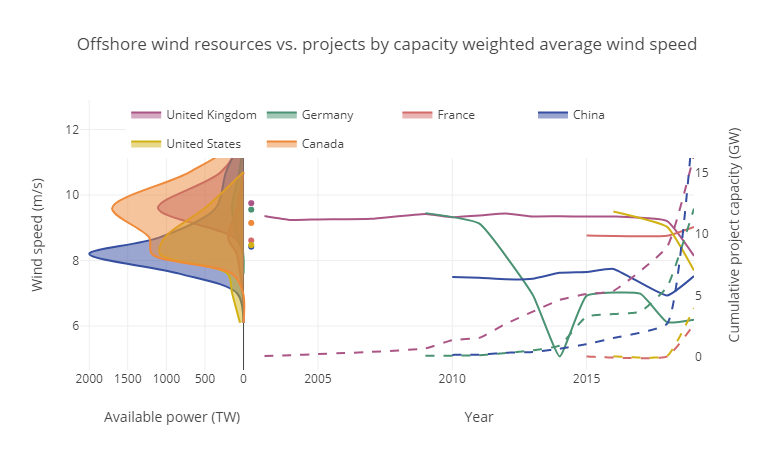

In [146]:
iplot(
    plotter(ofs, cs, c2s, colors, offshore=True, cumulative=True),
    filename='ofs1')

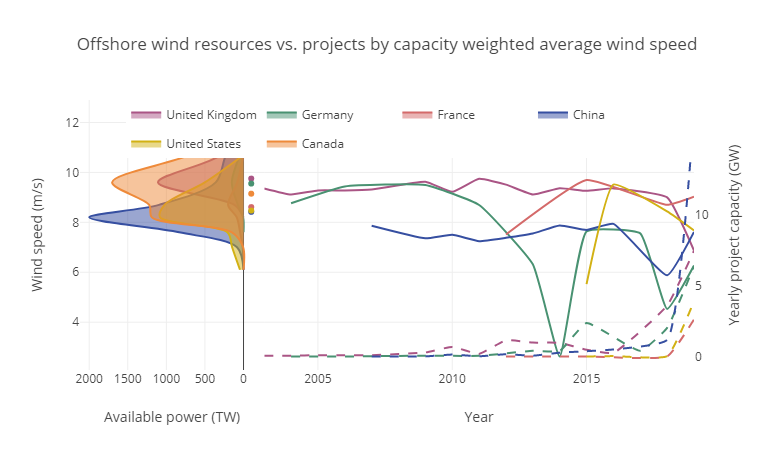

In [147]:
iplot(
    plotter(ofs, cs, c2s, colors, offshore=True, cumulative=False),
    filename='ofs2')


Select countries to conisder (those with *k* projects at least) to further data collection

In [89]:
onsk=ons.groupby('ISO_CODE')[['ID']].nunique().\
    reset_index().set_index('ID').sort_index(ascending=False)
ofsk=ofs.groupby('ISO_CODE')[['ID']].nunique().\
    reset_index().set_index('ID').sort_index(ascending=False)

In [90]:
#countries with more than k projects
onsk2 = onsk[onsk.index > 20]  #50
ofsk2 = ofsk[ofsk.index > 5]  #10

In [91]:
#kW to GW conversion
onsj=(ons.groupby('ISO_CODE')[['POWER_KW']].sum()).\
    reset_index().set_index('POWER_KW').sort_index(ascending=False)
ofsj=(ofs.groupby('ISO_CODE')[['POWER_KW']].sum()).\
    reset_index().set_index('POWER_KW').sort_index(ascending=False)

Select top _j_ countries by total capacity of projects. Only considering the ones larger than the *mincap* variables set above.

In [92]:
#top j countries by total capacity of projects
onsj2 = onsj[onsj.index > mincap_ons]
ofsj2 = ofsj[ofsj.index > mincap_ofs]

Create tree map plots of the top project llocation, by number of projects and by cumulative project size.

Install treemap library

In [93]:
#!pip install squarify

In [94]:
import squarify

Create nice color funtions

In [95]:
def get_spaced_colors(n):
    max_value = 16581375  #255**3
    interval = int(max_value / n)
    colors = [hex(I)[2:].zfill(6) for I in range(0, max_value, interval)]

    return ['rgb('+str(int(i[:2], 16))+','+\
                str(int(i[2:4], 16))+','+\
                str(int(i[4:], 16))+')' for i in colors]

In [96]:
#!pip install colorbrewer

In [97]:
import colorbrewer as cb

In [98]:
def colorme(n, light=False):
    if light: cbase = cb.Pastel2
    else: cbase = cb.Dark2
    cbase2 = cb.Accent
    colors = []
    m1 = max(cbase)
    if n <= m1:
        colors = cbase[max(n, min(cbase))]
    m2 = max(cbase2)
    if n <= m1 + m2:
        colors = cbase[m1] + cbase2[max(n - m1, min(cbase2))]
    else:
        return cbase[m1] + cbase[m2] + colorme(n - (m1 + m2), light=light)
    return colors[:n]

In [99]:
def rgbfy(a):
    return ['rgb' + str(i) for i in a]

In [100]:
def tree_plotter(df, colors, gid):
    x = 0.
    y = 0.
    width = 100.
    height = 100.

    values = np.array(df.index)
    labels = np.array(df.values).squeeze()

    normed = squarify.normalize_sizes(values, width, height)
    rects = squarify.squarify(normed, x, y, width, height)
    shapes = []
    annotations = []
    annotationsl = []
    for i, r in enumerate(rects):
        shapes.append(
            dict(
                type='rect',
                x0=r['x'],
                y0=r['y'],
                x1=r['x'] + r['dx'],
                y1=r['y'] + r['dy'],
                line=dict(width=2),
                fillcolor=colors[i]), )
        if gid % 2 == 0: divider = 1.0
        else: divider = 1e6
        if i < 10:
            label = labels[i] + '<br>' + str(np.round(values[i] / divider, 1))
        elif i < 30:
            label = labels[i]
        else:
            label = ''
        annotationsl.append(label)
        annotations.append(
            dict(
                x=r['x'] + (r['dx'] / 2),
                y=r['y'] + (r['dy'] / 2),
                text=label,
                font=dict(size=25),
                showarrow=False,
            ))

    # For hover text
    trace0 = go.Scatter(
        x=[r['x'] + (r['dx'] / 2) for r in rects],
        y=[r['y'] + (r['dy'] / 2) for r in rects],
        text=annotationsl,
        mode='text',
    )

    layout = dict(
        height=700,
        width=700,
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        shapes=shapes,
        annotations=annotations,
        hovermode='closest')

    # With hovertext
    fig = dict(data=[trace0], layout=layout)
    return fig

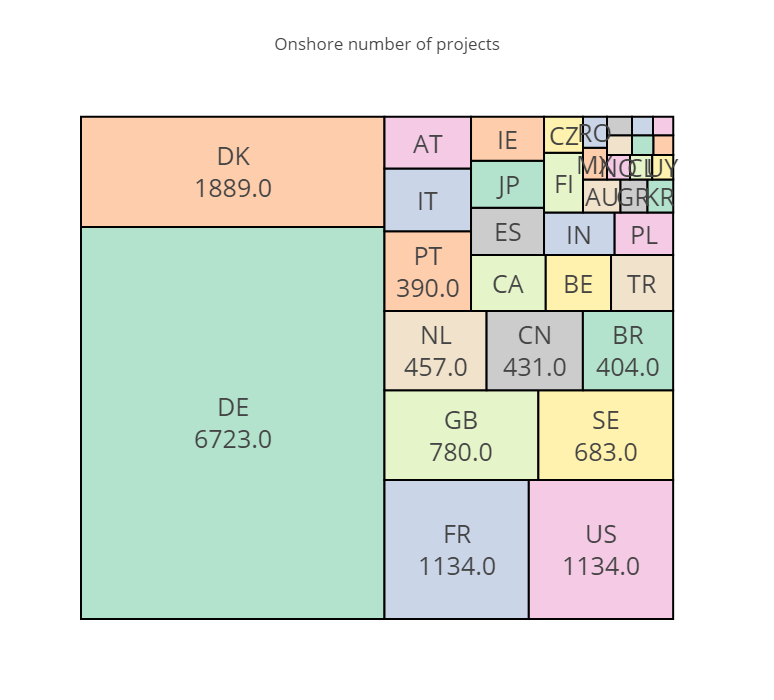

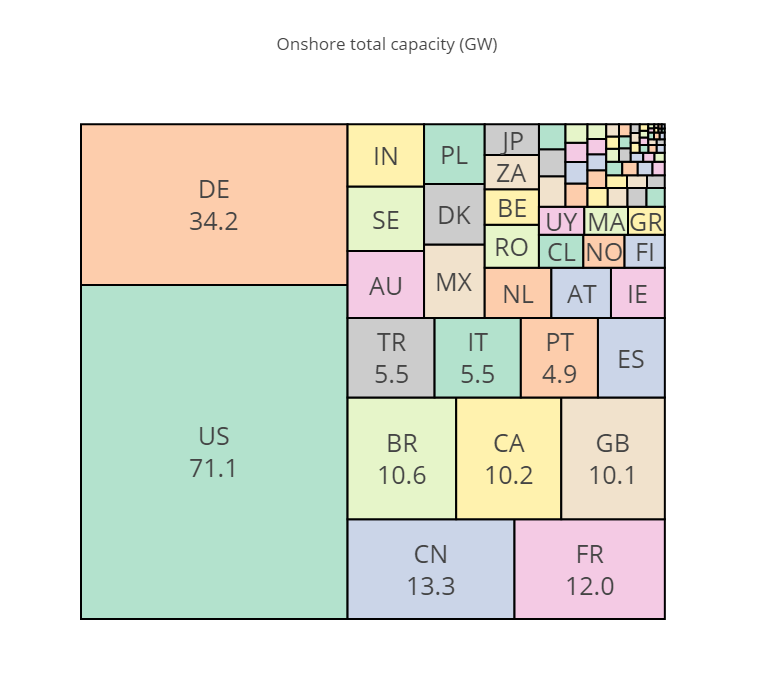

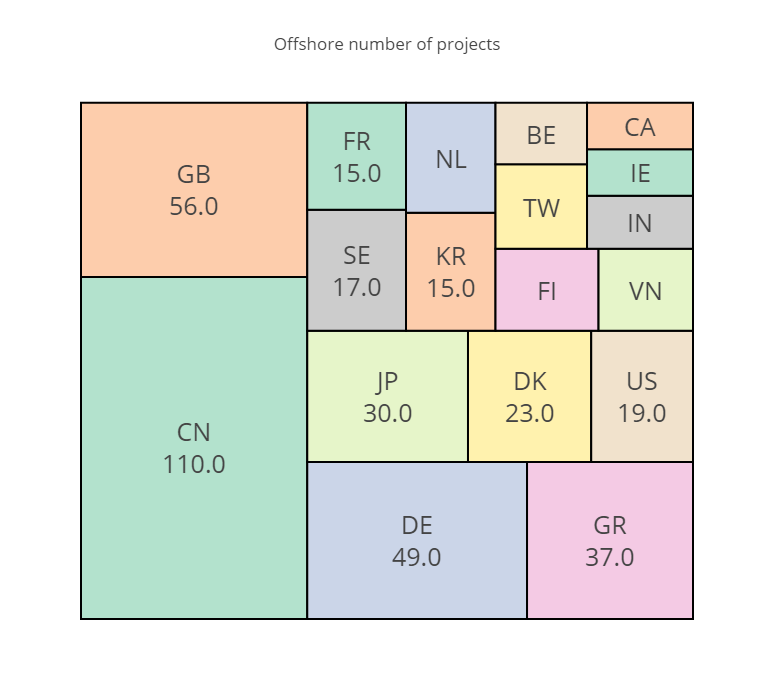

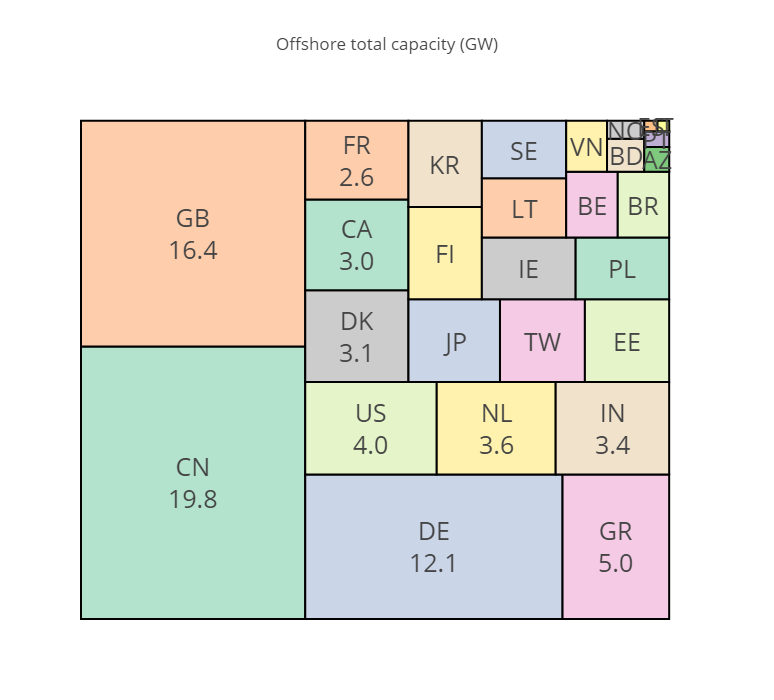

In [101]:
ds = [
    'Onshore number of projects', 'Onshore total capacity (GW)',
    'Offshore number of projects', 'Offshore total capacity (GW)'
]
dgs = [onsk2, onsj2, ofsk2, ofsj2]
for d in range(len(ds)):
    colors3 = rgbfy(colorme(len(dgs[d]), light=True))
    fig = tree_plotter(dgs[d], colors3, d)
    fig['layout']['title'] = ds[d]
    iplot(fig, filename='ofs_tree')

Plot first *k*

In [102]:
cs = onsk2[:6].values.squeeze()
c2s = cnc(cs)
colors3 = rgbfy(colorme(len(cs)))

First, plot the top *k* countries with the highest number of projects.

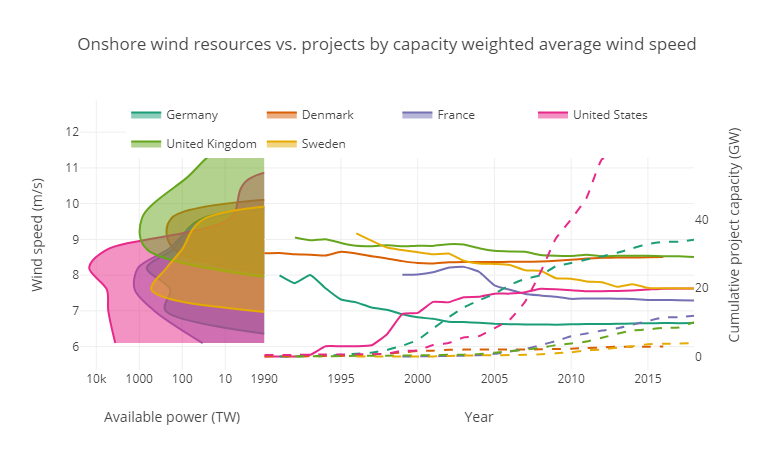

In [103]:
iplot(
    plotter(
        ons, cs, c2s, colors3, offshore=False, cumulative=True,
        axistype='log'),
    filename='onsk')

In [104]:
cs = ofsk2[:6].values.squeeze()
c2s = cnc(cs)
colors3 = rgbfy(colorme(len(cs)))

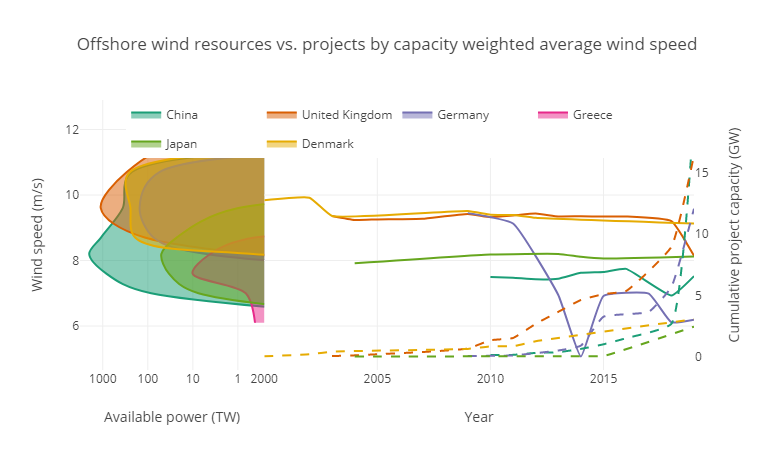

In [105]:
iplot(
    plotter(
        ofs, cs, c2s, colors3, offshore=True, cumulative=True, axistype='log'),
    filename='ofsk')

Then, plot the top *k* countries with the highest total capacity of projects. (only onshore, no big  difference in offshore compared to the previous case)

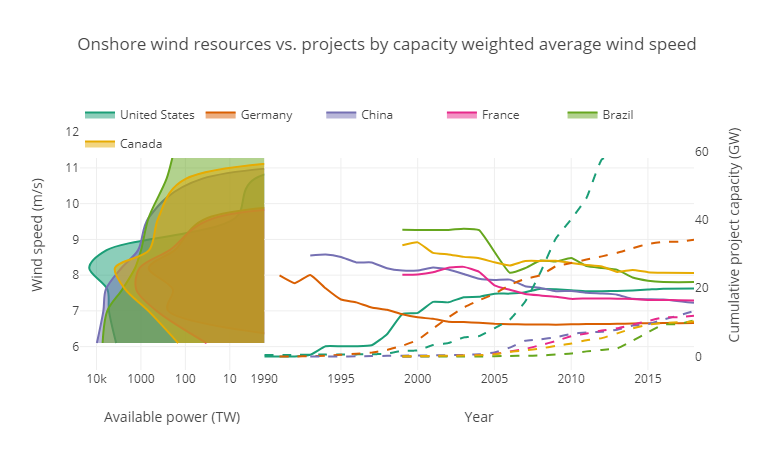

In [65]:
cs = onsj2.loc[onsj2.index[:6]].values.squeeze()
c2s = cnc(cs)
colors3 = rgbfy(colorme(len(cs)))
iplot(
    plotter(
        ons, cs, c2s, colors3, offshore=False, cumulative=True,
        axistype='log'),
    filename='onsj')

Define new plotter function capable  of handling more than 6 countries at once.

In [106]:
def megaplotter(df,
                cs,
                c2s,
                colors,
                offshore=True,
                cumulative=True,
                axistype='linear',
                mincap=0,
                minyear=0,
                minclass=0.1,
                stacked=False):
    fig = tools.make_subplots(
        rows=2, cols=3, print_grid=False)
    axes = []
    nr_plots = 4
    smoothing = [0.4, 0.9]
    if offshore:
        tl = 'Offshore'
        res = wind_res2
    else:
        tl = 'Onshore'
        res = wind_res
    if cumulative:
        cumu = 'Cumulative'
    else:
        cumu = 'Yearly'
    for i in range(len(cs)):
        c = cs[i]
        c2 = c2s[i]
        c3 = pretty(c2)
        x, y, z, w = projects(
            df,
            c,
            cumulative=cumulative,
            offshore=offshore,
            mincap=mincap,
            minyear=minyear)
        xh = [i for i in res[c2].keys()]  #helper
        x2 = [class2speed[i] for i in res[c2].keys()]
        y2 = np.array(list(res[c2].values()))
        #filter to nonzero classes
        rs = [r for r in range(len(y2)) if y2[r] > minclass]
        xh2 = np.array(xh)[rs]
        if min(xh2) > min(xh):
            rs = np.insert(rs, 0, rs[0] - 1)
        if max(xh2) < max(xh):
            rs = np.insert(rs, len(rs), rs[-1] + 1)
        x2 = np.array(x2)[rs]
        y2 = np.array(y2)[rs]
        if len(x) > 1:
            #calculate average resource class, weighted by available capacity in each class
            x2a = np.average(x2, weights=y2)
            if len(axes) / nr_plots > 10: showlegend = False
            else: showlegend = True
            if stacked:
                fig.append_trace(
                    go.Scatter(
                        x=y2,
                        y=x2,
                        mode='lines',
                        #fillcolor=colors[i].replace(')',',0.5)').replace('b','ba'),
                        stackgroup='one',
                        orientation='h',
                        hoveron='fills',
                        legendgroup=c3,
                        name=c3,
                        showlegend=showlegend,
                        line=dict(
                            color=colors[i],
                            shape='spline',
                            smoothing=smoothing[1])),
                    2,
                    3)
            else:
                fig.append_trace(
                    go.Scatter(
                        x=y2,
                        y=x2,
                        mode='lines',
                        fill='tozerox',
                        hoveron='fills',
                        legendgroup=c3,
                        name=c3,
                        showlegend=showlegend,
                        line=dict(
                            color=colors[i],
                            shape='spline',
                            smoothing=smoothing[1])), 2, 3)
            axes.append({
                'x': '3',
                'y': '2'
            })
            fig.append_trace(
                go.Scatter(
                    x=[0],
                    y=[x2a],
                    legendgroup=c3,
                    name=c3,
                    marker=dict(color=colors[i], ),
                    showlegend=False), 2, 2)
            axes.append({
                'x': '2',
                'y': '2'
            })
            fig.append_trace(
                go.Scatter(
                    x=x,
                    y=z,
                    mode='lines',
                    name=c3,
                    legendgroup=c3,
                    line=dict(
                        color=colors[i],
                        shape='spline',
                        smoothing=smoothing[0]),
                    showlegend=False), 2, 1)
            axes.append({
                'x': '',
                'y': '2'
            })
            fig.append_trace(
                go.Scatter(
                    x=x,
                    y=np.array(w) / 1e6,  #kW to GW conversion
                    mode='lines',
                    name=c3,
                    legendgroup=c3,
                    line=dict(
                        color=colors[i],
                        shape='spline',
                        #dash='dash',
                        smoothing=smoothing[0]),
                    showlegend=False),
                1,
                1)
            axes.append({
                'x': '',
                'y': ''
            })

    for i in range(len(fig['data'])):
        fig['data'][i]['xaxis'] = 'x' + axes[i]['x']
        fig['data'][i]['yaxis'] = 'y' + axes[i]['y']

    yrange = [6, 9]
    if len(cs) > 6:
        legendx = 1.08
        legendy = 0.5
        xbreak = 0.6
        xend = 0.85
        lyanchor = 'middle'
    else:
        legendx = 0.98
        legendy = 1
        xbreak = 0.7
        xend = 1
        lyanchor = 'top'
    layout = go.Layout(
        xaxis2=dict(
            domain=[xbreak - 0.05, xbreak + 0.02],
            anchor='y2',
            zeroline=False,
            showgrid=False,
            showline=False,
            ticks='',
            showticklabels=False),
        xaxis3=dict(
            domain=[xbreak, xend],
            title='Available power (TW)',
            type=axistype,
            anchor='y2',
        ),
        yaxis2=dict(
            domain=[0, 0.5],
            title='Wind speed (m/s)',
            hoverformat='.2f',
            zeroline=False,
            #range=yrange
        ),
        xaxis=dict(domain=[0, xbreak - 0.05], anchor='y2', title='Year'),
        yaxis=dict(
            domain=[0.5, 1],
            hoverformat='.2f',
            title=cumu + '<br>capacity (GW)',
            zeroline=False,
            type=axistype,
        ),
        title=tl +
        ' wind resources vs. projects by capacity weighted average wind speed',
        legend=dict(
            orientation='v',
            x=legendx,
            y=legendy,
            xanchor='right',
            yanchor=lyanchor))
    fig["layout"] = layout
    fig["layout"]['hovermode'] = 'x'
    return fig

Re-plot top *k* countries by number of projects.

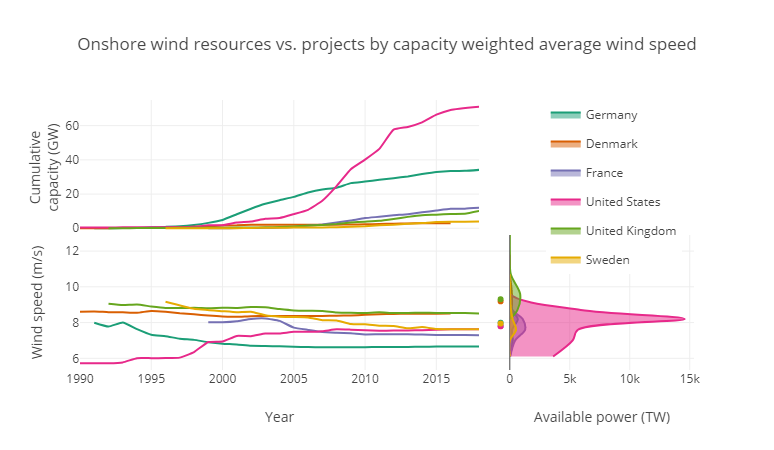

In [107]:
cs = onsk2[:6].values.squeeze()
c2s = cnc(cs)
colors3 = rgbfy(colorme(len(cs)))
iplot(
    megaplotter(ons, cs, c2s, colors3, offshore=False, cumulative=True),
    filename='onskmega')

Re-plot top *k* countries by total capacity of projects.

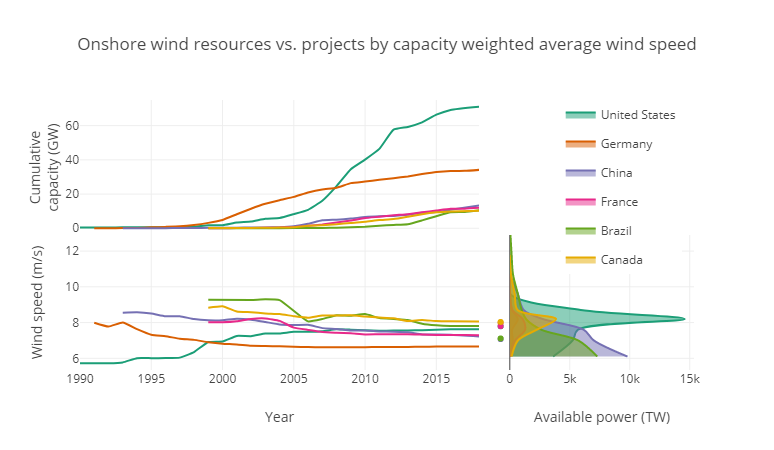

In [68]:
cs = onsj2.loc[onsj2.index[:6]].values.squeeze()
c2s = cnc(cs)
colors3 = rgbfy(colorme(len(cs)))
iplot(
    megaplotter(ons, cs, c2s, colors3, offshore=False, cumulative=True),
    filename='onsjmega')

Repeat for offshore.

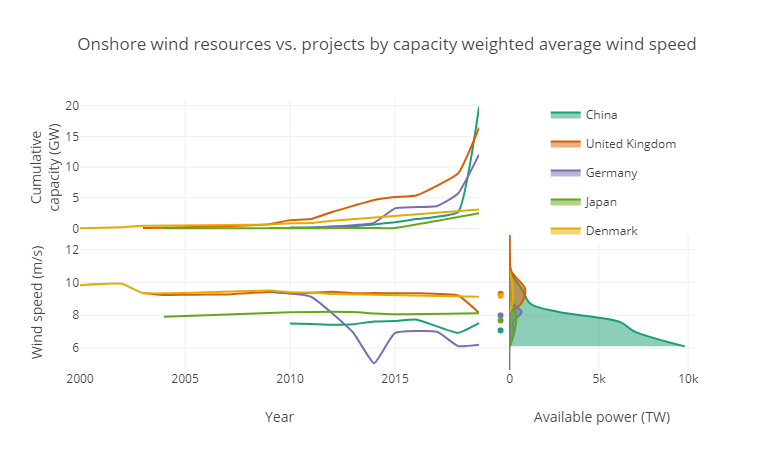

In [69]:
cs = ofsk2[:6].values.squeeze()
c2s = cnc(cs)
colors3 = rgbfy(colorme(len(cs)))
iplot(
    megaplotter(ofs, cs, c2s, colors3, offshore=False, cumulative=True),
    filename='ofskmega')

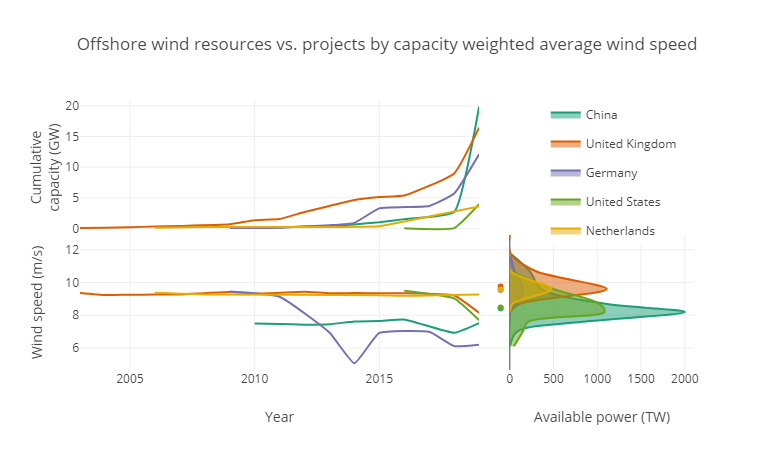

In [70]:
cs = ofsj2.loc[ofsj2.index[:6]].values.squeeze()
c2s = cnc(cs)
colors3 = rgbfy(colorme(len(cs)))
iplot(
    megaplotter(ofs, cs, c2s, colors3, offshore=True, cumulative=True),
    filename='ofsjmega')

All countries

Using the new `megaplotter`, plot the evolution of prejects vs. resource distribution for all countries that are relevant, i.e. pass the minimum capacity filter. Only show the top 11 options on the legend, but the rest of them are plotted as well.

In [71]:
k = 8
cs1 = set(onsk2[:k].values.squeeze())
cs2 = set(onsj2.loc[onsj2.index[:k]].values.squeeze())
cs = list(cs1.union(cs2))
len(cs)

11

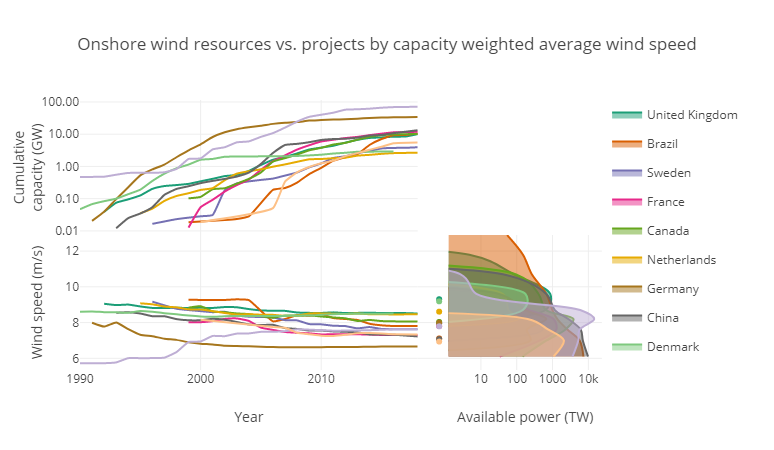

In [72]:
c2s = cnc(cs)
colors3 = rgbfy(colorme(len(cs)))
iplot(
    megaplotter(
        ons, cs, c2s, colors3, offshore=False, cumulative=True,
        axistype='log'),
    filename='onskmega-U')

In [73]:
k = 12
cs1 = set(ofsk2[:k].values.squeeze())
cs2 = set(ofsj2.loc[ofsj2.index[:k]].values.squeeze())
cs = list(cs1.union(cs2))
len(cs)

15

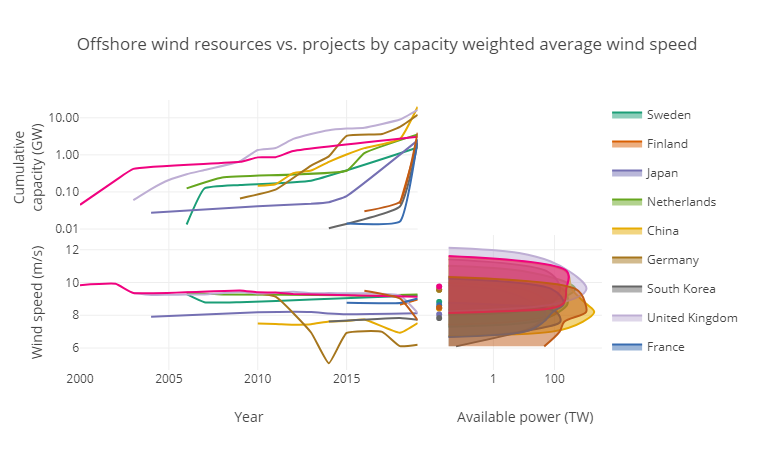

In [74]:
c2s = cnc(cs)
colors3 = rgbfy(colorme(len(cs)))
iplot(
    megaplotter(
        ofs, cs, c2s, colors3, offshore=True, cumulative=True, axistype='log'),
    filename='ofskmega-U')

Finally, we define a custom function called `resource_getter` to be able to return all countries, with being able to override the minimum capacity filter.

In [75]:
def resource_getter(offshore=False):
    if offshore:
        res = wind_res2
        res2 = ofs
        res3 = ofsj2
    else:
        res = wind_res
        res2 = ons
        res3 = onsj2
    cs = res3.values.squeeze()
    c2s = cnc(cs)
    es = []
    e2s = []
    for i in range(len(cs)):
        if c2s[i] in res:
            es.append(cs[i])
            e2s.append(c2s[i])
    return res, res2, res3, es, e2s, rgbfy(colorme(len(es)))

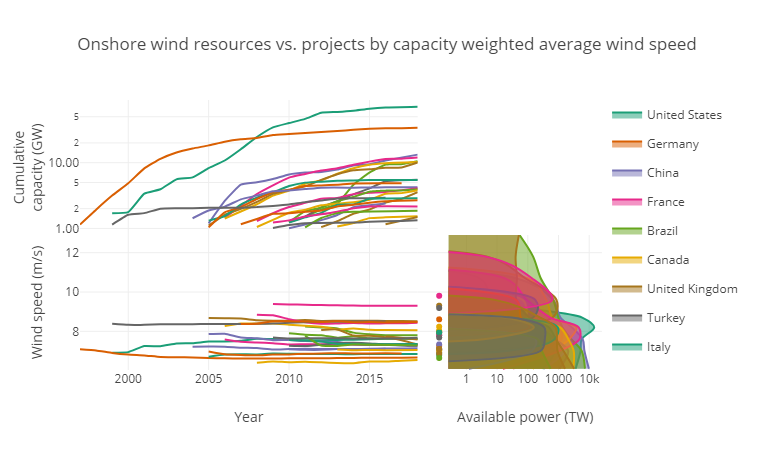

In [76]:
offshore = False
mincap = 1e6  #set mincap in kW 1e3=1MW, 1e6=1GW
res, res2, res3, cs, c2s, colors3 = resource_getter(offshore=offshore)
iplot(
    megaplotter(
        res2,
        cs,
        c2s,
        colors3,
        offshore=offshore,
        cumulative=True,
        mincap=mincap,
        axistype='log',
        stacked=False),
    filename='onsmega-ALL')

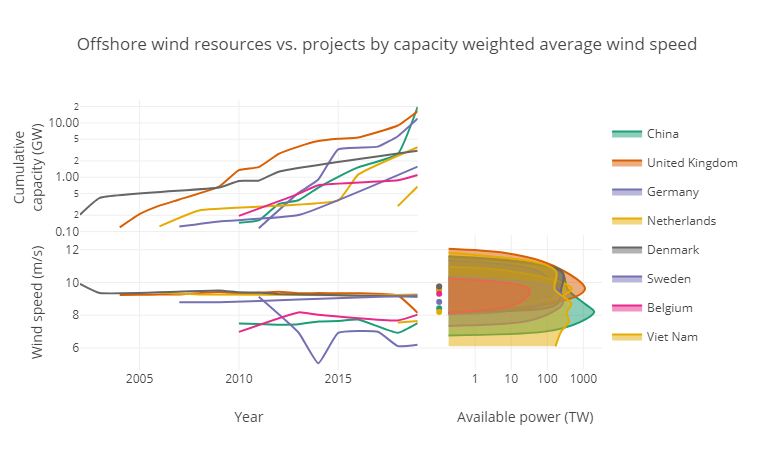

In [77]:
offshore = True
mincap = 1e5
res, res2, res3, cs, c2s, colors3 = resource_getter(offshore=offshore)
iplot(
    megaplotter(
        res2,
        cs,
        c2s,
        colors3,
        offshore=offshore,
        cumulative=True,
        mincap=mincap,
        axistype='log',
        stacked=False),
    filename='ofsmega-ALL')

### Curves Fitting

#### Wind speed evolution
Fit exponential decay curves to project wind speeds by year.

 #### Project size evolution
 Fit exponential growth curves to cumulative capacity by year.

#### Resource utilization
Calculate resource utilization factor.

#### Completeness
Compare database completeness to installed capacity.